# Phys 311 dielectric interface lab report

Here is the python package I used for this lab report:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl
mpl.get_cachedir()

'C:\\Users\\alber\\.matplotlib'

1. Calucalte the angle of incidence $\theta$ = 180 $^\circ$ - $\beta$ /2

In [72]:
df = pd.read_csv('Dielectirc_interface.csv')
df["theta"] = 180 - df["deg"] / 2
print(df["theta"])


0     20.0
1     25.0
2     30.0
3     35.0
4     40.0
5     45.0
6     50.0
7     55.0
8     60.0
9     65.0
10    70.0
11    75.0
12    80.0
13    90.0
Name: theta, dtype: float64


2. Divide each measurement by its reference measurement. Answers are unitless.

In [73]:
for col in df:
    if col[2] == "i":
        df["{}{}".format(col[0:2],"_rf_ratio")] = df["{}{}".format(col[0:2],"o")]/df[col]
df1 = df.iloc[:,9:] 

3. Divide the each point with reference 90 $^\circ$ measurement. normalized reflectance at each angle to its value at 90 $^\circ$

In [74]:
for col in df1:
    if col[-1] == "o":
        new_col = "{}{}".format(col[0:2],"_nor_rf")
        df1[new_col] = df1[col].divide(df1.iloc[-1][col])
df2 = df1.iloc[:,5:]
        

4. Ploting of reflectance against the angle.

    theta  ru_rf_ratio  rd_rf_ratio  gu_rf_ratio  gd_rf_ratio  ru_nor_rf  \
0    20.0     0.005687     0.008347     0.006543     0.009524   0.034662   
1    25.0     0.005052     0.009189     0.005875     0.010476   0.030789   
2    30.0     0.004301     0.010161     0.005125     0.011667   0.026210   
3    35.0     0.003438     0.011657     0.004000     0.013333   0.020950   
4    40.0     0.002495     0.013686     0.003000     0.015476   0.015204   
5    45.0     0.001492     0.016414     0.001772     0.018675   0.009090   
6    50.0     0.000633     0.019655     0.000886     0.021687   0.003857   
7    55.0     0.000064     0.024056     0.000127     0.027831   0.000387   
8    60.0     0.000297     0.031111     0.000380     0.035610   0.001808   
9    65.0     0.002076     0.040123     0.002532     0.045732   0.012654   
10   70.0     0.006872     0.052156     0.007949     0.059634   0.041883   

    rd_nor_rf  gu_nor_rf  gd_nor_rf  
0    0.019979   0.043464   0.060882  
1    0.0219

<Figure size 432x288 with 0 Axes>

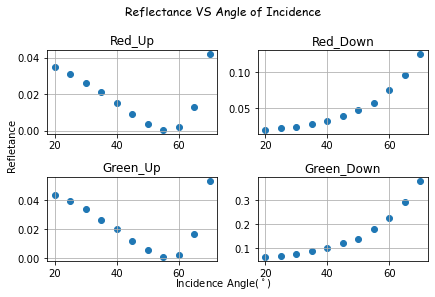

<Figure size 12000x6000 with 0 Axes>

In [81]:
df3 = df1.iloc[:-3] # eliminate 90 degree data set
print(df3)
plt.clf()
csfont = {'fontname':'Comic Sans MS'}
# set up ploting figure
fig, axs = plt.subplots(2, 2)
plt.figure(figsize=(10,5), dpi=1200)
fig.suptitle("Reflectance VS Angle of Incidence", **csfont)
fig.text(0.5, 0.01, 'Incidence Angle($^\circ$)', ha='center')
fig.text(0.001, 0.5, 'Refletance', va='center', rotation='vertical')

axs[0,0].scatter(df3["theta"], df3["ru_nor_rf"])
axs[0,0].set_title("Red_Up")
axs[0,1].scatter(df3["theta"], df3["rd_nor_rf"])
axs[0,1].set_title("Red_Down")
axs[1,0].scatter(df3["theta"], df3["gu_nor_rf"])
axs[1,0].set_title("Green_Up")
axs[1,1].scatter(df3["theta"], df3["gd_nor_rf"])
axs[1,1].set_title("Green_Down")
axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
fig.tight_layout()


fig.savefig('ref_ang.jpg', bbox_inches = 'tight', dpi=1000)

5. Find fiting fresnel equation

In [76]:
def fresnel_pd_equ(th, n, mul, c):
    """
    Fresnel equation for perpendicular polarization, with input of th for incident angle theta,
    n for index of reflectance, mul for multiplyer, c for constant to add to the function.
    """
    num = np.cos(th) - np.sqrt(n**2 - np.sin(th)**2)
    den = np.cos(th) + np.sqrt(n**2 - np.sin(th)**2)
    return((num/den)**2)*mul + c

def fresnel_pl_equ(th, n, mul, c):
    """
    Fresnel equation for parallel polarization, with input of th for incident angle theta,
    n for index of reflectance, mul for multiplyer, c for constant to add to the function.
    """
    num = np.cos(th)*n**2 - np.sqrt(n**2 - np.sin(th)**2)
    den = np.cos(th)*n**2 + np.sqrt(n**2 - np.sin(th)**2)
    return((num/den)**2)*mul + c

def fit(f,x,y):
    popt, pcov = curve_fit(f,x,y, bounds=[(1,0,-0.1),(1.7,2,0.1)],p0=[1,1,0])
    return popt, pcov


In [77]:
# convert theta in degree to radian
x = []
for a in df3["theta"]:
    x.append(math.radians(a))
ru_y = df3["ru_nor_rf"].to_numpy()
rd_y = df3["rd_nor_rf"].to_numpy()
gu_y = df3["gu_nor_rf"].to_numpy()
gd_y = df3["gd_nor_rf"].to_numpy()

ru_fit = fit(fresnel_pl_equ, x, gu_y)
print("parameter={}".format(ru_fit[0]))
print("std={}".format(np.sqrt(np.diag(ru_fit[1]))))

parameter=[1.51136580e+00 1.23716660e+00 9.25202395e-04]
std=[0.00215339 0.01047791 0.00022835]


6. plot fitted fresnel equation with data.

In [78]:
ru_fit = fresnel_pl_equ()

TypeError: fresnel_pl_equ() missing 4 required positional arguments: 'th', 'n', 'mul', and 'c'